In [1]:
import pytesseract
from img_doc.extractors.word_extractors import BaseWordExtractor
from img_doc.data_structures import Word
import numpy as np
from typing import List

class TesseractWordExtractor(BaseWordExtractor):
    def extract_from_img(self, img: np) -> List[Word]:
        tesseract_bboxes = pytesseract.image_to_data(
            config="-l rus",
            image=img,
            output_type=pytesseract.Output.DICT)
        word_list = []
        for index_bbox, level in enumerate(tesseract_bboxes["level"]):
            if level == 5:
                word = Word(text = tesseract_bboxes["text"][index_bbox])
                word.set_point_and_size({
                    "x_top_left":tesseract_bboxes["left"][index_bbox],
                    "y_top_left":tesseract_bboxes["top"][index_bbox],
                    "width":tesseract_bboxes["width"][index_bbox],
                    "height": tesseract_bboxes["height"][index_bbox],
                })
                word_list.append(word)
        return word_list

In [17]:
from img_doc.data_structures import Image
import os

image = Image()
image.set_img_from_path(os.path.join("img", "1.jpg"))

word_ext = TesseractWordExtractor()
words = word_ext.extract_from_img(image.img)


In [18]:
from img_doc.extractors.block_extractors.block_extractor_from_word import KMeanBlockExtractor
kmeanext = KMeanBlockExtractor()


In [19]:
history = {"no_join_blocks":[], "dist_word": 0 }
blocks = kmeanext.extract_from_word(words, history)

In [20]:
blocks[0]

(413.0, 141.0)

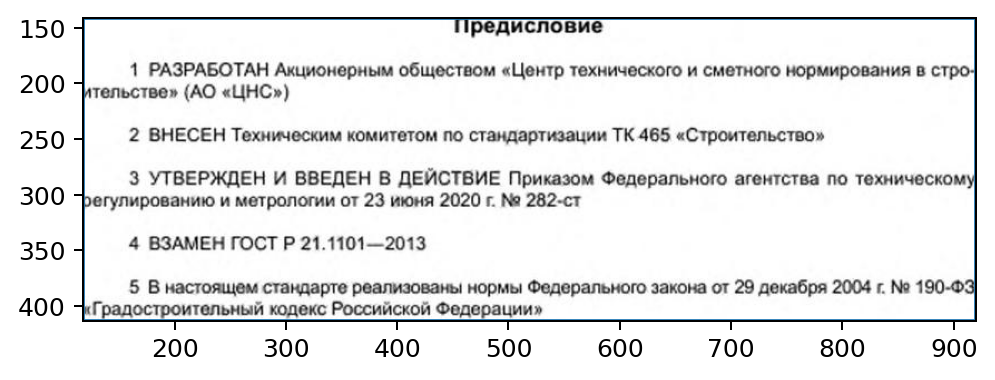

In [21]:
import matplotlib.pyplot as plt

plt.figure(dpi=180)
plt.imshow(image.img)

block = blocks[0]
x0 = block.segment.x_top_left
y0 = block.segment.y_top_left
x1 = block.segment.x_bottom_right
y1 = block.segment.y_bottom_right
plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])
plt.xlim([x0, x1])
plt.ylim([y1, y0])

In [24]:
block = blocks2[1]
new_doc = Image(img=block.segment.get_segment_from_img(image.img))
words2 = word_ext.extract_from_img(new_doc.img)
history2 = {"no_join_blocks":[], "dist_word": 0 }
blocks2 = kmeanext.extract_from_word(words2, history2)

ValueError: min() arg is an empty sequence

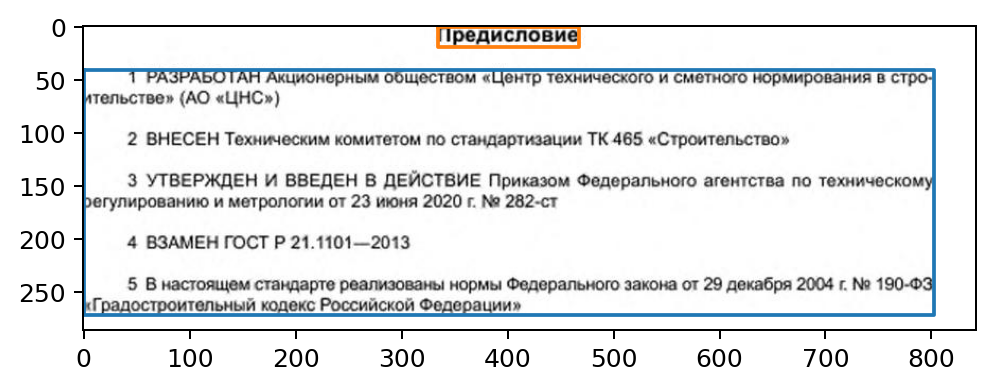

In [23]:
import matplotlib.pyplot as plt

color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(new_doc.img)

for block in blocks2:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])